# Week 06: Business Statistics & Analytics - E-commerce Analysis

## Learning Objectives
By the end of this exercise, you will be able to:
- Calculate key business metrics using pandas
- Create meaningful visualizations for business insights
- Apply statistical concepts to real business scenarios
- Make data-driven recommendations

---

## Business Context

You're working as a Data Analyst for **TechMart**, an e-commerce company. Your manager needs insights from last quarter's sales data to inform strategic decisions for the upcoming quarter.

Your analysis will help answer critical questions about customer behavior, regional performance, and product trends that directly impact business growth.

## Dataset Setup

First, let's generate the synthetic dataset you'll be analyzing:

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set random seed for reproducible results
np.random.seed(42)

# Generate 500 orders from 2023
n_orders = 500

# Create order IDs and customer data
order_id = np.arange(1, n_orders + 1)
customer_id = np.random.randint(1, 101, size=n_orders)
customer_segment = np.random.choice(["Student", "Professional", "Senior"], size=n_orders, p=[0.4, 0.4, 0.2])
region = np.random.choice(["North", "South", "East", "West"], size=n_orders)
order_date = pd.date_range(start="2023-01-01", periods=n_orders, freq="D")
product_category = np.random.choice(["Electronics", "Clothing", "Books", "Home", "Sports"], size=n_orders)
quantity = np.random.randint(1, 5, size=n_orders)
unit_price = np.round(np.random.uniform(10, 200, size=n_orders), 2)
revenue = quantity * unit_price
discount_applied = np.random.choice([0, 5, 10, 15, 20, 25, 30], size=n_orders, p=[0.5,0.1,0.1,0.1,0.05,0.05,0.1])
payment_method = np.random.choice(["Credit Card", "PayPal", "Gift Card", "Debit Card"], size=n_orders)

# Build dataframe
df = pd.DataFrame({
    "order_id": order_id,
    "customer_id": customer_id,
    "customer_segment": customer_segment,
    "region": region,
    "order_date": order_date,
    "product_category": product_category,
    "quantity": quantity,
    "unit_price": unit_price,
    "revenue": revenue,
    "discount_applied": discount_applied,
    "payment_method": payment_method
})

# Save dataset for reference
df.to_csv("ecommerce_data.csv", index=False)
print("✅ Dataset created successfully!")

# Display first few rows
df.head()

✅ Dataset created successfully!


,order_id,customer_id,customer_segment,region,order_date,product_category,quantity,unit_price,revenue,discount_applied,payment_method
0,1,52,Student,North,2023-01-01,Clothing,1,42.43,42.43,0,Debit Card
1,2,93,Student,West,2023-01-02,Sports,1,24.18,24.18,0,Gift Card
2,3,15,Professional,East,2023-01-03,Sports,3,158.71,476.13,0,Debit Card
3,4,72,Student,East,2023-01-04,Sports,1,60.42,60.42,0,Credit Card
4,5,61,Student,West,2023-01-05,Books,3,43.78,131.34,0,Gift Card


## Data Exploration

Let's start by understanding our dataset:

In [2]:
# Load the data
data = pd.read_csv("ecommerce_data.csv")

# Basic information about the dataset
print("Dataset Info:")
print(data.info())
print("\nDataset Shape:", data.shape)
print("\nFirst few rows:")
data.head()

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   order_id          500 non-null    int64  
 1   customer_id       500 non-null    int64  
 2   customer_segment  500 non-null    object 
 3   region            500 non-null    object 
 4   order_date        500 non-null    object 
 5   product_category  500 non-null    object 
 6   quantity          500 non-null    int64  
 7   unit_price        500 non-null    float64
 8   revenue           500 non-null    float64
 9   discount_applied  500 non-null    int64  
 10  payment_method    500 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 43.1+ KB
None

Dataset Shape: (500, 11)

First few rows:


,order_id,customer_id,customer_segment,region,order_date,product_category,quantity,unit_price,revenue,discount_applied,payment_method
0,1,52,Student,North,2023-01-01,Clothing,1,42.43,42.43,0,Debit Card
1,2,93,Student,West,2023-01-02,Sports,1,24.18,24.18,0,Gift Card
2,3,15,Professional,East,2023-01-03,Sports,3,158.71,476.13,0,Debit Card
3,4,72,Student,East,2023-01-04,Sports,1,60.42,60.42,0,Credit Card
4,5,61,Student,West,2023-01-05,Books,3,43.78,131.34,0,Gift Card


Monthly Revenue:
month
2023-01    6626.66
2023-02    6796.03
2023-03    8960.10
2023-04    7713.47
2023-05    7266.80
2023-06    7982.47
2023-07    7981.65
2023-08    6664.64
2023-09    9708.06
2023-10    7287.27
2023-11    8795.85
2023-12    8119.44
2024-01    7268.59
2024-02    8388.91
2024-03    6835.73
2024-04    7430.29
2024-05    4314.71
Freq: M, Name: revenue, dtype: float64


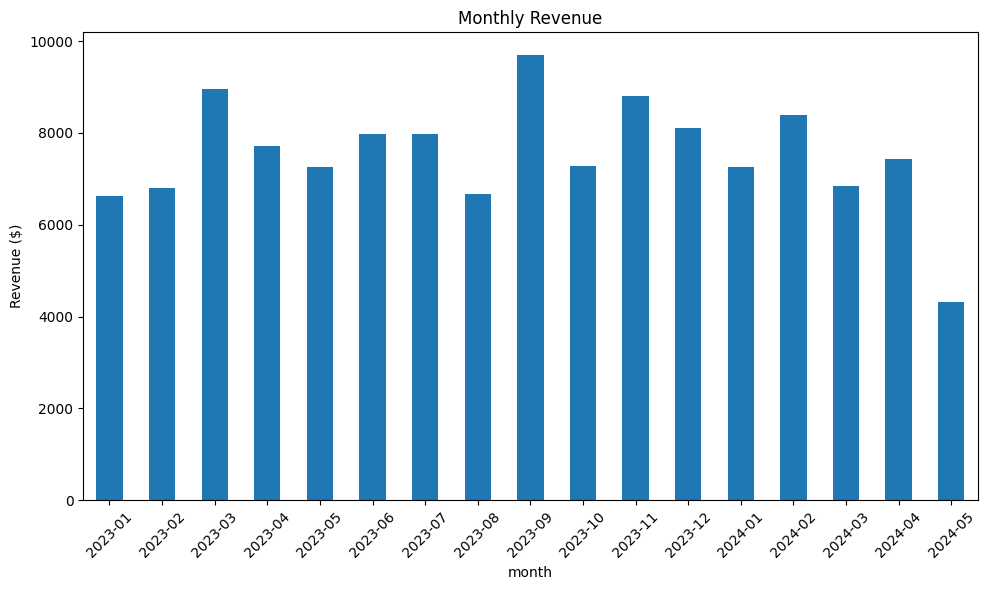

In [3]:
# Convert order_date to datetime and add helpful columns
data["order_date"] = pd.to_datetime(data["order_date"])
data["month"] = data["order_date"].dt.to_period("M")
data["day_of_week"] = data["order_date"].dt.day_name()

# Example: Revenue by month
monthly_revenue = data.groupby("month")["revenue"].sum()
print("Monthly Revenue:")
print(monthly_revenue)

# Plot monthly revenue
monthly_revenue.plot(kind="bar", figsize=(10,6), title="Monthly Revenue")
plt.ylabel("Revenue ($)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

---

## Business Questions

Now answer each of the following business questions. Use the starter code above as a reference, and expand your analysis to solve all questions.

### 1. Revenue Overview
What was the company's total revenue last quarter? Break it down by month.

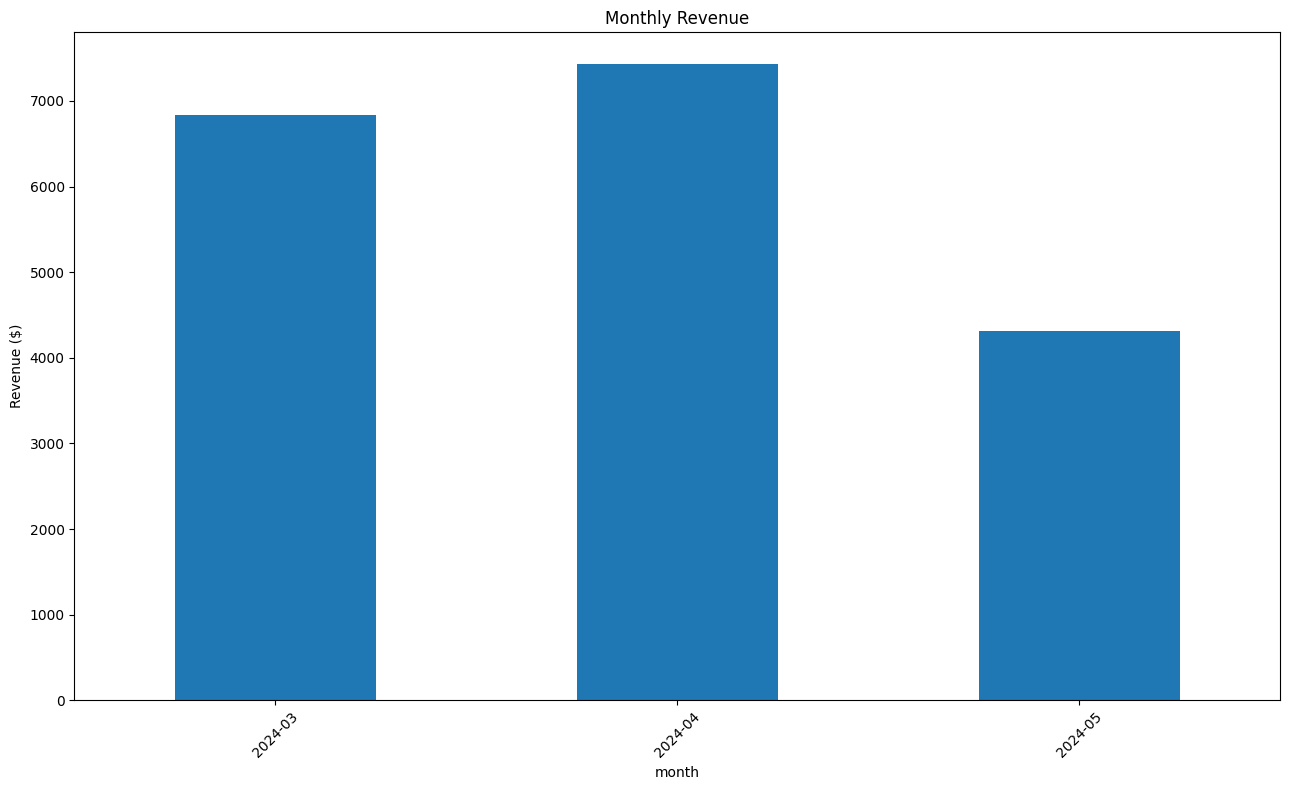


Total Revenue: $128,140.67
Revenue of Last Quarter (from march-may 2025): $18,580.73

Last Quarter Monthly Revenue Breakdown:
Month      Revenue($)
2024-03      6,835.73
2024-04      7,430.29
2024-05      4,314.71


In [ ]:
# Your code here

total_revenue = df["revenue"].sum()
monthly_revenue = df.groupby("month")["revenue"].sum()

last_quarter_months = ["2024-03", "2024-04", "2024-05"]
df_lastquart = df[df["month"].astype(str).isin(last_quarter_months)]
total_revenue_quarter = df_lastquart["revenue"].sum()

monthly_revenue_quarter_df = df_lastquart.groupby("month")["revenue"].sum()

# visualization - bar chart
monthly_revenue_quarter_df.plot(kind="bar", figsize=(13,8), title="Monthly Revenue")
plt.ylabel("Revenue ($)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# turn into list so it can be printed in Last Quarter Monthly Revenue Breakdown
months = monthly_revenue_quarter_df.index.astype(str).tolist()
revenues = monthly_revenue_quarter_df.tolist()

# Answer to Q1
print(f"\nTotal Revenue: ${total_revenue:,.2f}")
print(f"Revenue of Last Quarter (from march-may 2025): ${total_revenue_quarter:,.2f}\n")

print("Last Quarter Monthly Revenue Breakdown:")
print("{:<10} {:>10}".format("Month", "Revenue($)"))

for month, revenue in zip(months, revenues):
    print("{:<10} {:>10,.2f}".format(month, revenue))



### 2. Top Customers
Who are the top 5 customers by total revenue contribution?

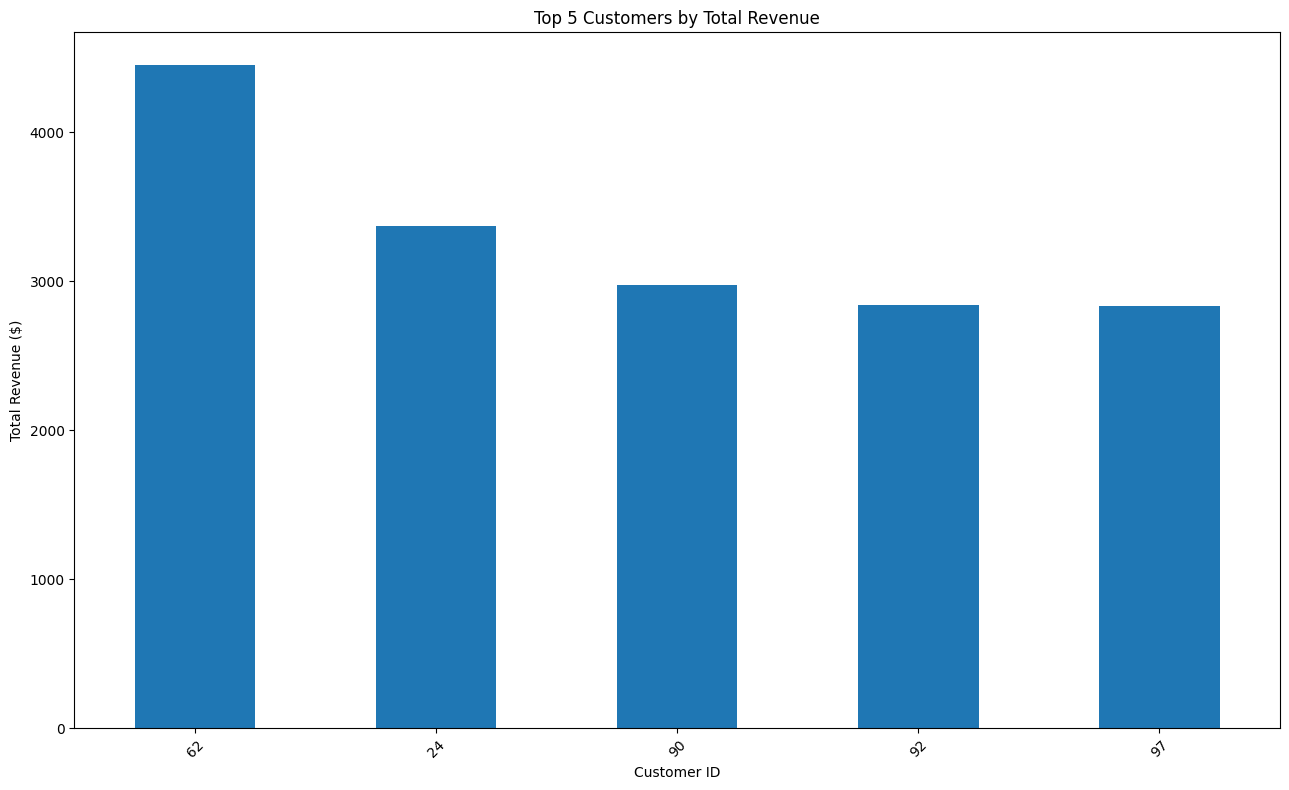

Top 5 Customers by Total Revenue:

Customer ID     Total Revenue($)
62                     4,448.39
24                     3,369.44
90                     2,976.78
92                     2,838.74
97                     2,835.62


In [34]:
# Your code here

customer_revenue = df.groupby('customer_id')['revenue'].sum()
top_5_customers = customer_revenue.nlargest(5)

customer_ids = top_5_customers.index.tolist()
revenues = top_5_customers.tolist()

# visualization - bar chart
top_5_customers.plot(kind="bar", figsize=(13,8), title="Top 5 Customers by Total Revenue")
plt.xlabel("Customer ID")
plt.ylabel("Total Revenue ($)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Answer to Q2
print("Top 5 Customers by Total Revenue:\n")
print("{:<15} {:>15}".format("Customer ID", "Total Revenue($)"))

for customer_id, revenue in zip(customer_ids, revenues):
    print("{:<15.0f} {:>15,.2f}".format(customer_id, revenue))

### 3. Segment Analysis
Which customer segment (Student, Professional, Senior) spends the most on average per order?

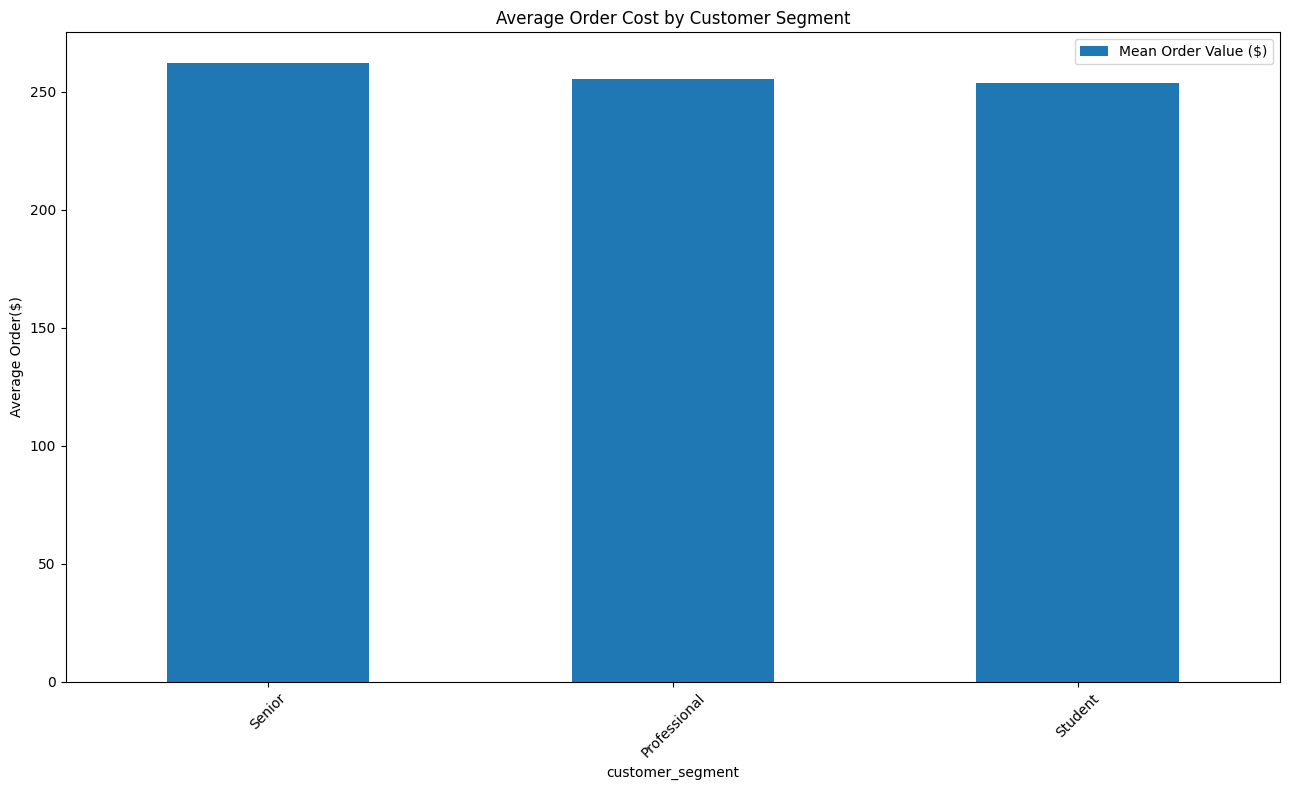

Highest spenders is the Senior segment
                                                                
Segment         Mean Order Value ($)
Senior              262.13
Professional        255.65
Student             253.81


In [47]:
# Your code here

segment_avgval = df.groupby('customer_segment').agg(
    Total_Revenue=('revenue', 'sum'),
    Total_Orders=('order_id', 'count')
).reset_index()

segment_avgval['Mean Order Value ($)'] = segment_avgval['Total_Revenue'] / segment_avgval['Total_Orders']

segment_avgval = segment_avgval.sort_values(by='Mean Order Value ($)', ascending=False)

# visualization - bar chart
segment_avgval.plot(kind="bar", x="customer_segment", y="Mean Order Value ($)",
                    figsize=(13,8), title="Average Order Cost by Customer Segment")
plt.xlabel("customer_segment")
plt.ylabel("Average Order($)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

segments = segment_avgval['customer_segment'].tolist()
mean_values = segment_avgval['Mean Order Value ($)'].tolist()

# Answer to Q3
highest_aov_segment = segment_avgval.iloc[0]
print(f"Highest spenders is the {highest_aov_segment['customer_segment']} segment")
print(f"                                                                ")
print("{:<15} {:>10}".format("Segment", "Mean Order Value ($)"))
for segment, mean_value in zip(segments, mean_values):
    print("{:<15} {:>10,.2f}".format(segment, mean_value))

### 4. Regional Trends
Which region generated the highest revenue? Which region had the highest average order size?

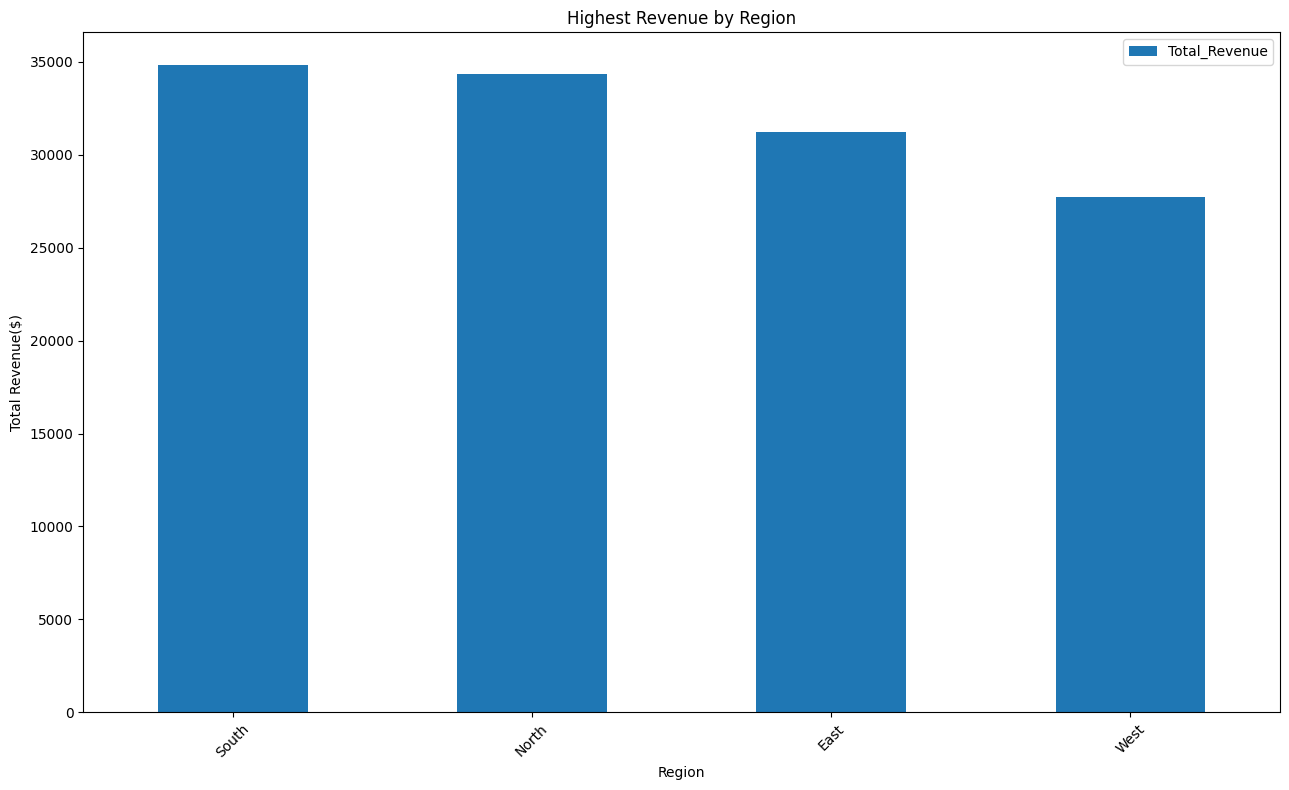

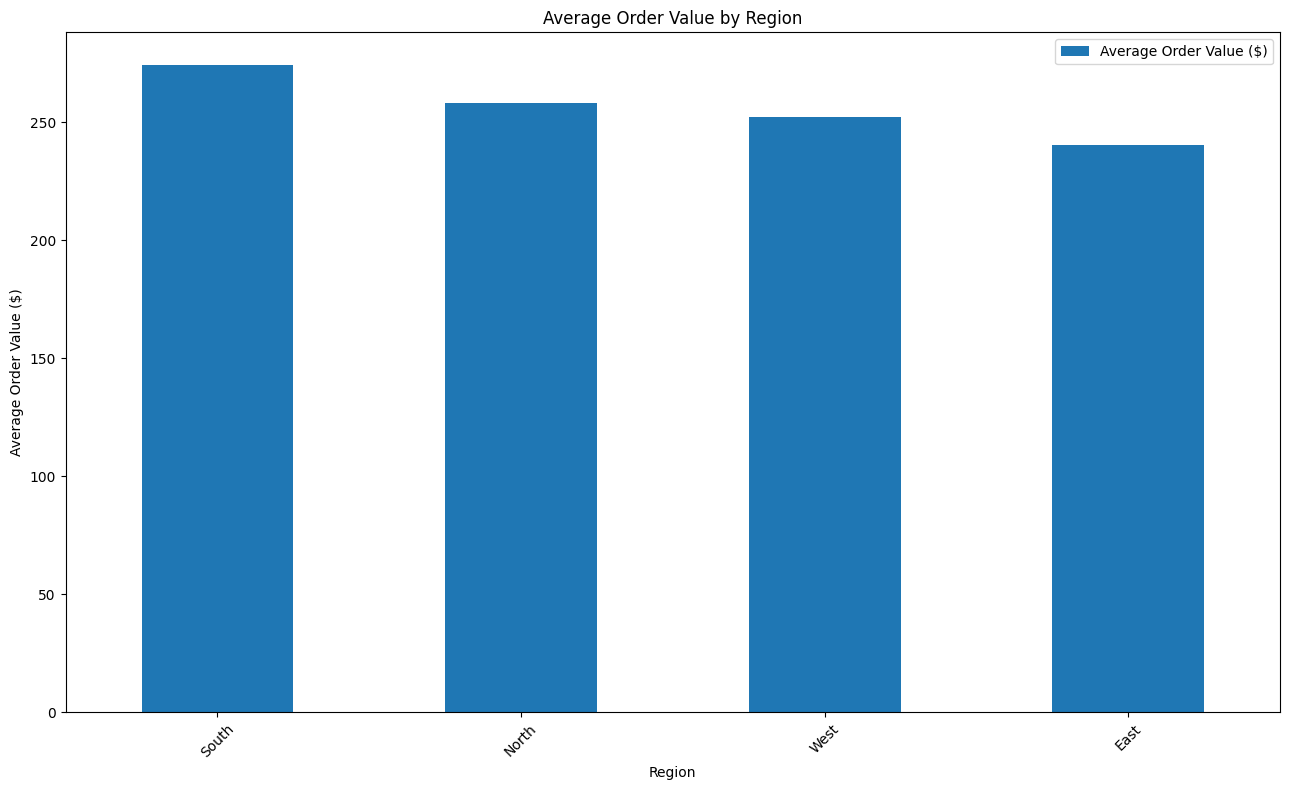

Region with highest revenue is the South, with $34,839.45.
Region with highest average order size is the South, with $274.33.


In [48]:
# Your code here

regional_trends = df.groupby('region').agg(
    Total_Revenue=('revenue', 'sum'),
    Total_Orders=('order_id', 'count')
).reset_index()

regional_trends['Average Order Value ($)'] = regional_trends['Total_Revenue'] / regional_trends['Total_Orders']

regional_trends_sorted_revenue = regional_trends.sort_values(by='Total_Revenue', ascending=False)
regional_trends_sorted_avgval = regional_trends.sort_values(by='Average Order Value ($)', ascending=False)

# Identify the leading regions
highest_revenue_region = regional_trends_sorted_revenue.iloc[0]['region']
highest_aov_region = regional_trends_sorted_avgval.iloc[0]['region']

# visualization 1 (highest revenue) - bar chart
regional_trends_sorted_revenue.plot(kind="bar", x="region", y="Total_Revenue",
                    figsize=(13,8), title="Highest Revenue by Region")
plt.xlabel("Region")
plt.ylabel("Total Revenue($)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# visualization 2 (highest average order size) - bar chart
regional_trends_sorted_avgval.plot(kind="bar", x="region", y="Average Order Value ($)",
                    figsize=(13,8), title="Average Order Value by Region")
plt.xlabel("Region")
plt.ylabel("Average Order Value ($)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Answer to Q4
print(f"Region with highest revenue is the {highest_revenue_region}, with ${regional_trends_sorted_revenue.iloc[0]['Total_Revenue']:,.2f}.")
print(f"Region with highest average order size is the {highest_aov_region}, with ${regional_trends_sorted_avgval.iloc[0]['Average Order Value ($)']:.2f}.")

### 5. Product Category Performance
Which product category is most popular by quantity vs. by revenue?

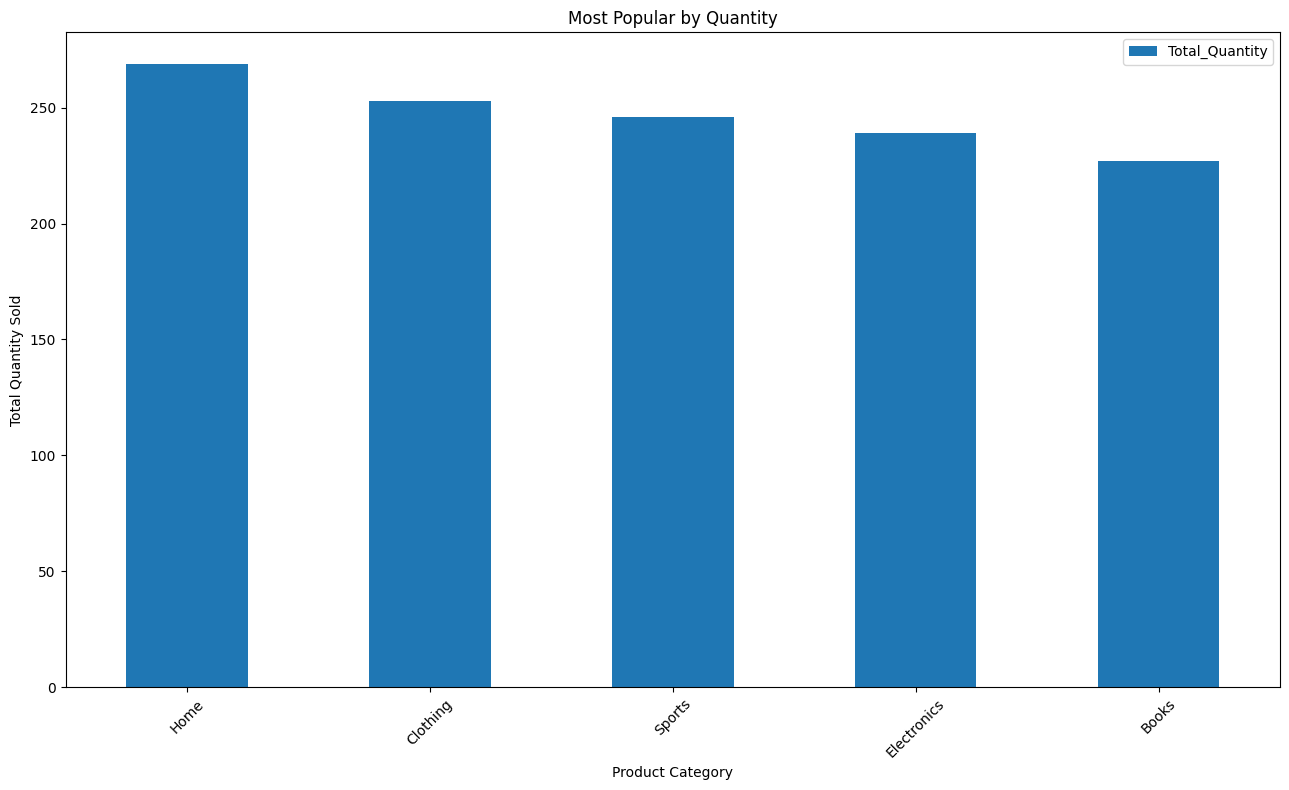

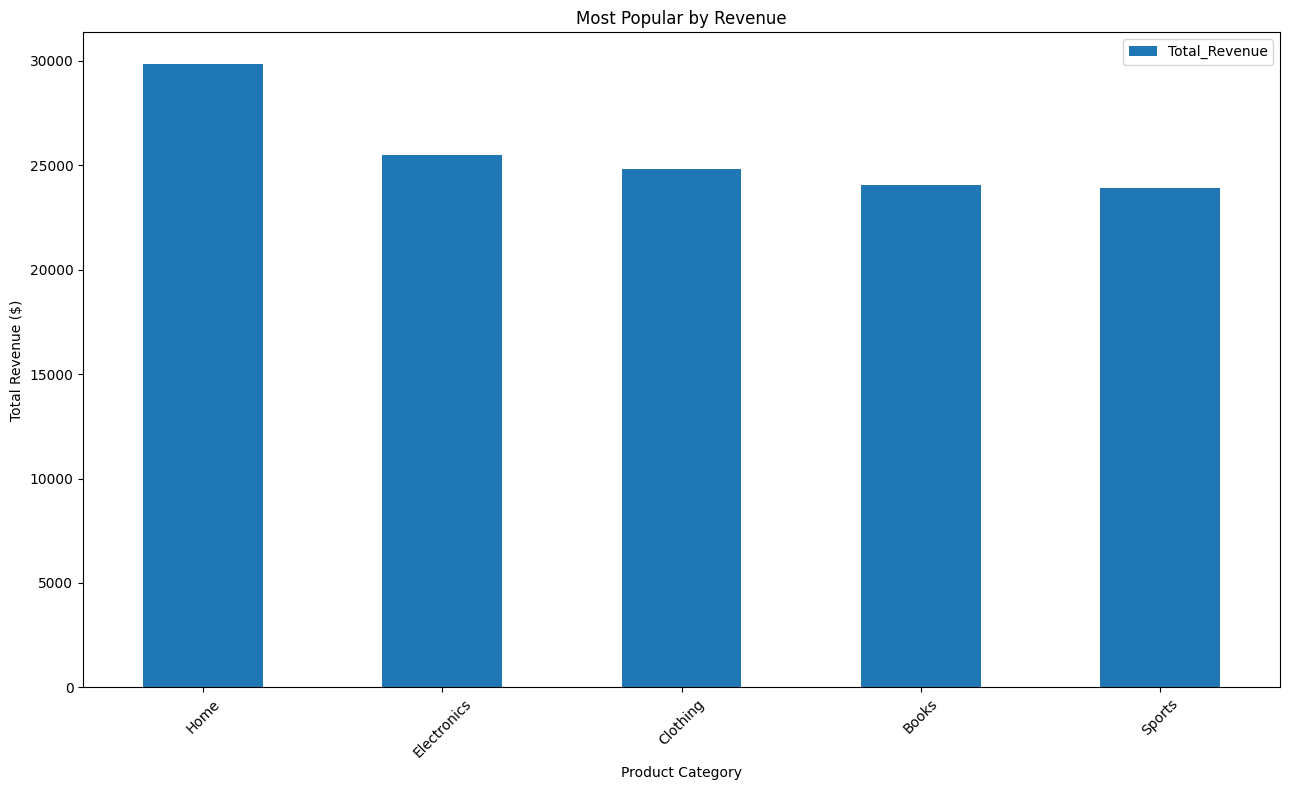

Most popular by quantity: Home, with a total of 269 sold.
Most popular by revenue: Home, with a total of $29,871.47.


In [5]:
# Your code here

product_performance = df.groupby('product_category').agg(
    Total_Quantity=('quantity', 'sum'),
    Total_Revenue=('revenue', 'sum')
).reset_index()

quantity_sorted = product_performance.sort_values(by='Total_Quantity', ascending=False)
revenue_sorted = product_performance.sort_values(by='Total_Revenue', ascending=False)

most_popular_by_quantity = quantity_sorted.iloc[0]['product_category']
quantity_value = quantity_sorted.iloc[0]['Total_Quantity']
most_popular_by_revenue = revenue_sorted.iloc[0]['product_category']
revenue_value = revenue_sorted.iloc[0]['Total_Revenue']

# visualization 1 (most popular by quantity) - bar chart
quantity_sorted.plot(kind="bar", x="product_category", y="Total_Quantity",
                    figsize=(13,8), title="Most Popular by Quantity")
plt.xlabel("Product Category")
plt.ylabel("Total Quantity Sold")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# visualization 2 (most popular by revenue) - bar chart
revenue_sorted.plot(kind="bar", x="product_category", y="Total_Revenue",
                    figsize=(13,8), title="Most Popular by Revenue")
plt.xlabel("Product Category")
plt.ylabel("Total Revenue ($)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Answer to Q5
print(f"Most popular by quantity: {most_popular_by_quantity}, with a total of {quantity_value:,} sold.")
print(f"Most popular by revenue: {most_popular_by_revenue}, with a total of ${revenue_value:,.2f}.")

### 6. Discount Effectiveness
Do discounted orders generate higher or lower revenue per order compared to non-discounted orders?

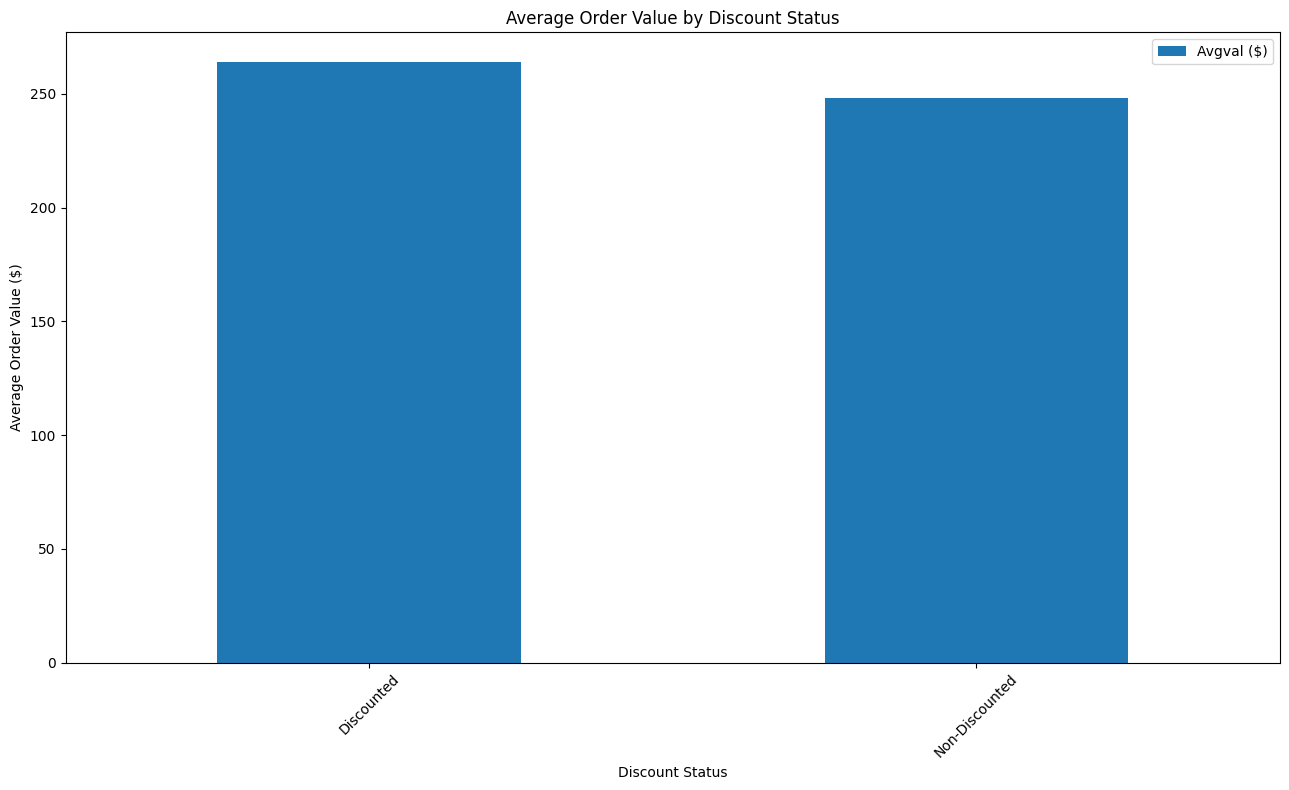

Average Order Value for Discounted Orders: $263.83
Average Order Value for Non-Discounted Orders: $248.30


In [7]:
# Your code here

df['Discount_Status'] = df['discount_applied'].apply(lambda x: 'Discounted' if x > 0 else 'Non-Discounted')

discount_analysis = df.groupby('Discount_Status').agg(
    Total_Revenue=('revenue', 'sum'),
    Total_Orders=('order_id', 'count')
).reset_index()

discount_analysis['Avgval ($)'] = discount_analysis['Total_Revenue'] / discount_analysis['Total_Orders']
discount_analysis_sorted = discount_analysis.sort_values(by='Avgval ($)', ascending=False)

discounted_aov = discount_analysis_sorted[discount_analysis_sorted['Discount_Status'] == 'Discounted']['Avgval ($)'].iloc[0]
non_discounted_aov = discount_analysis_sorted[discount_analysis_sorted['Discount_Status'] == 'Non-Discounted']['Avgval ($)'].iloc[0]

# visualization - bar chart
discount_analysis_sorted.plot(kind="bar", x="Discount_Status", y="Avgval ($)",
                    figsize=(13,8), title="Average Order Value by Discount Status")
plt.xlabel("Discount Status")
plt.ylabel("Average Order Value ($)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Answer to Q6 
print(f"Average Order Value for Discounted Orders: ${discounted_aov:,.2f}")
print(f"Average Order Value for Non-Discounted Orders: ${non_discounted_aov:,.2f}")

### 7. Payment Method Usage
What percentage of orders use each payment method? Does any payment method correlate with higher spending?

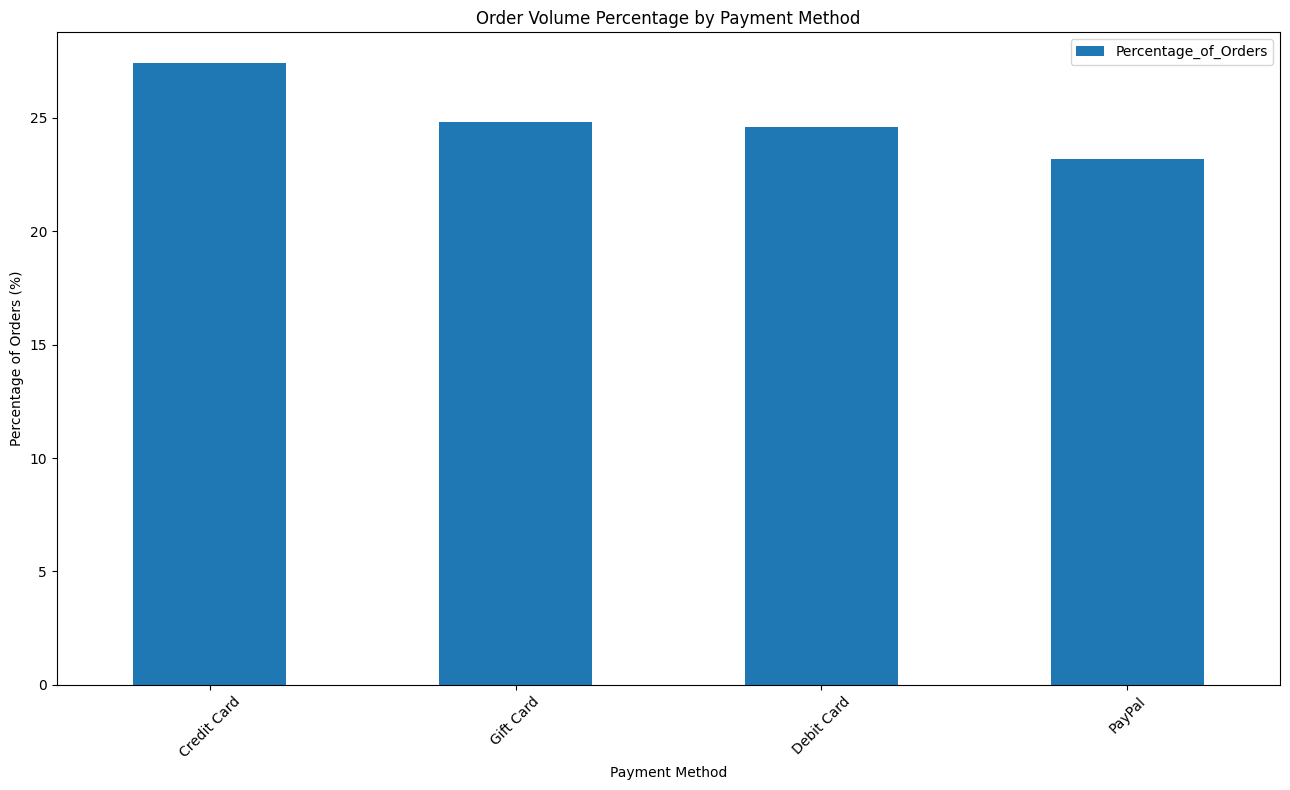

Payment Method Usage & Spending Correlation:

Order Volume Percentage Breakdown:
Method          Volume (%)
Credit Card          27.40
Gift Card            24.80
Debit Card           24.60
PayPal               23.20

Conclusion on Spending Correlation:
Payment method that correlates with highest spending is Debit Card, with an Average Order Value of $275.98.


In [9]:
# Your code here

#% orders
total_orders = df.shape[0]
payment_volume = df.groupby('payment_method')['order_id'].count().reset_index()
payment_volume['Percentage_of_Orders'] = (payment_volume['order_id'] / total_orders) * 100
payment_volume = payment_volume.sort_values(by='Percentage_of_Orders', ascending=False)

# Average Order Value by Payment Method
payment_aov = df.groupby('payment_method').agg(
    Total_Revenue=('revenue', 'sum'),
    Total_Orders=('order_id', 'count')
).reset_index()

payment_aov['AOV ($)'] = payment_aov['Total_Revenue'] / payment_aov['Total_Orders']
payment_aov_sorted = payment_aov.sort_values(by='AOV ($)', ascending=False)

# Table
final_payment_analysis = pd.merge(payment_volume, payment_aov_sorted[['payment_method', 'AOV ($)']], on='payment_method')
final_payment_analysis = final_payment_analysis.sort_values(by='Percentage_of_Orders', ascending=False)

# Find correlation
highest_aov_method = payment_aov_sorted.iloc[0]

# visualization - bar chart
final_payment_analysis.plot(kind="bar", x="payment_method", y="Percentage_of_Orders",
                    figsize=(13,8), title="Order Volume Percentage by Payment Method")
plt.xlabel("Payment Method")
plt.ylabel("Percentage of Orders (%)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

methods = final_payment_analysis['payment_method'].tolist()
percentages = final_payment_analysis['Percentage_of_Orders'].tolist()

# Answer to Q7 
print("Payment Method Usage & Spending Correlation:\n")

print("Order Volume Percentage Breakdown:")
print("{:<15} {:>10}".format("Method", "Volume (%)"))

for method, percentage in zip(methods, percentages):
    print("{:<15} {:>10.2f}".format(method, percentage))

print(f"\nConclusion on Spending Correlation:")
print(f"Payment method that correlates with highest spending is {highest_aov_method['payment_method']}, with an Average Order Value of ${highest_aov_method['AOV ($)']:.2f}.")

### 8. Seasonality Check
Plot revenue by day of week — are weekends busier than weekdays?

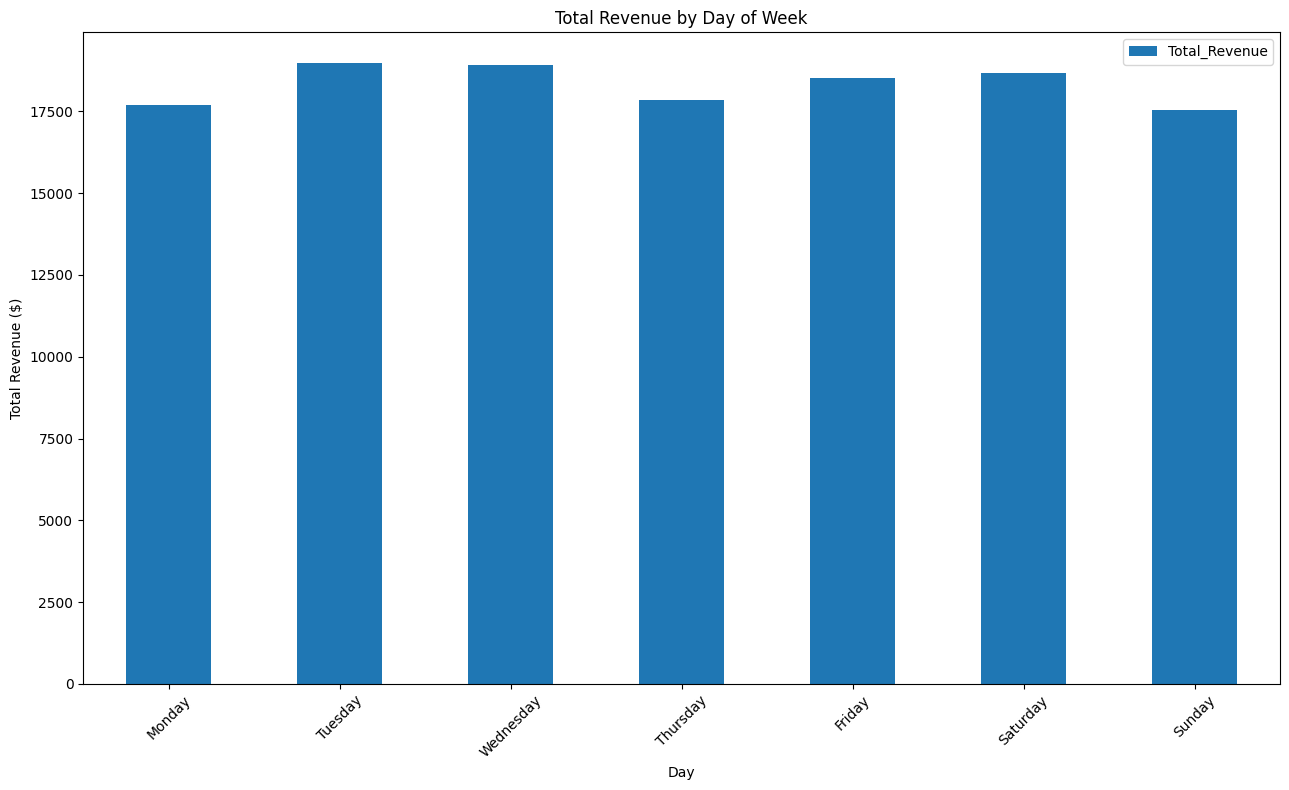

Total Weekday Revenue (Mon-Fri): $91,950.08
Total Weekend Revenue (Sat-Sun): $36,190.59
                          
Daily Revenue Breakdown:
Day             Total Revenue ($)
Monday                17,704.70
Tuesday               18,968.41
Wednesday             18,908.21
Thursday              17,846.36
Friday                18,522.40
Saturday              18,660.35
Sunday                17,530.24


In [15]:
# Your code here

df["Day_of_Week"] = df["order_date"].dt.day_name()
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

daily_revenue = df.groupby('Day_of_Week')['revenue'].sum().reindex(day_order).reset_index()
daily_revenue.columns = ['Day_of_Week', 'Total_Revenue']

weekday_days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday']
weekday_revenue = daily_revenue[daily_revenue['Day_of_Week'].isin(weekday_days)]['Total_Revenue'].sum()
weekend_revenue = daily_revenue[~daily_revenue['Day_of_Week'].isin(weekday_days)]['Total_Revenue'].sum()

# visualization - bar chart
daily_revenue.plot(kind="bar", x="Day_of_Week", y="Total_Revenue",
                    figsize=(13,8), title="Total Revenue by Day of Week")
plt.xlabel("Day")
plt.ylabel("Total Revenue ($)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Answer to Q8 
print(f"Total Weekday Revenue (Mon-Fri): ${weekday_revenue:,.2f}")
print(f"Total Weekend Revenue (Sat-Sun): ${weekend_revenue:,.2f}")

print("                          ")
print("Daily Revenue Breakdown:")
print("{:<15} {:>15}".format("Day", "Total Revenue ($)"))

days = daily_revenue['Day_of_Week'].tolist()
revenues = daily_revenue['Total_Revenue'].tolist()

for day, revenue in zip(days, revenues):
    print("{:<15} {:>15,.2f}".format(day, revenue))

### 9. Profitability (Stretch)
Assume profit margin = 20% of revenue. Estimate total profit and identify the most profitable region.

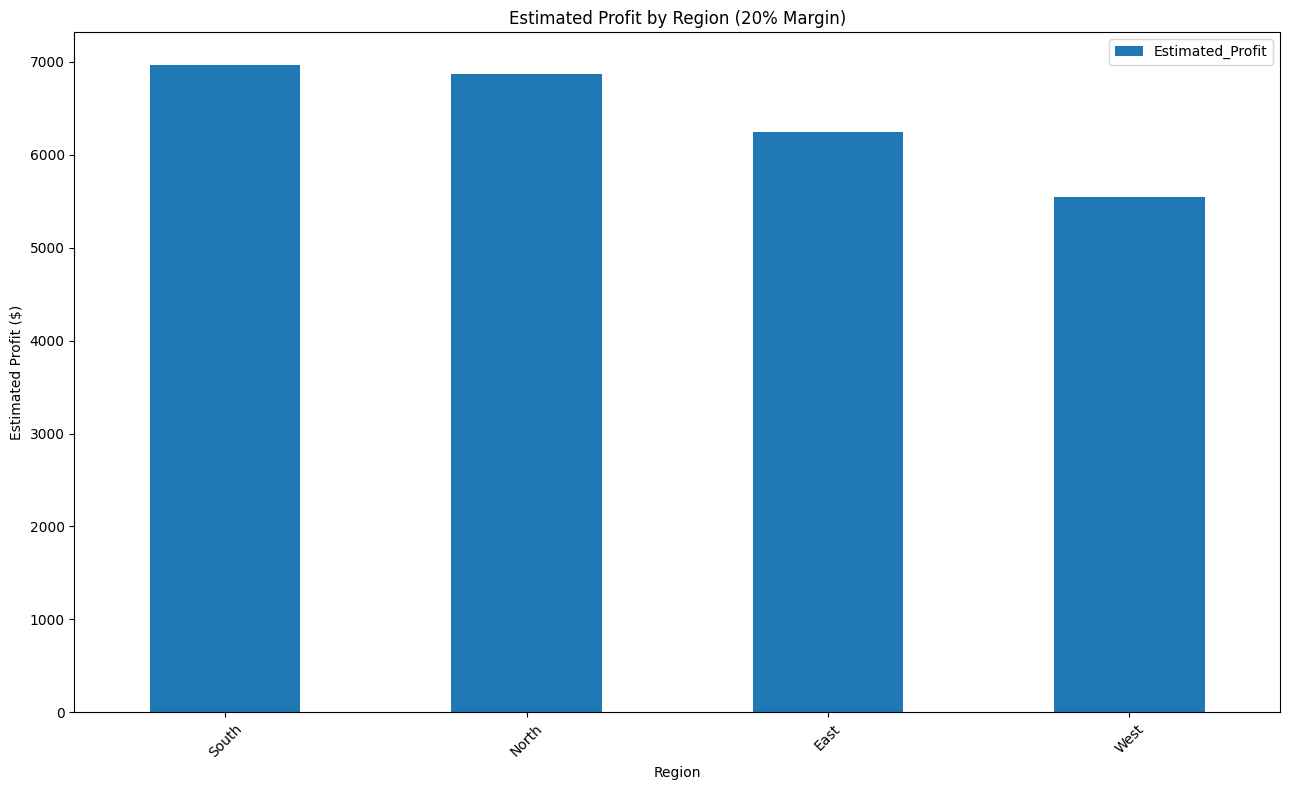

Total Estimated Profit (at 20% margin): $25,628.13

Regional Estimated Profit Breakdown:
Region     Estimated Profit ($)
East              6,244.36
North             6,870.34
South             6,967.89
West              5,545.55

The most profitable region is the South, with an estimated profit of $6,967.89.


In [17]:
# Your code here

PROFIT_MARGIN = 0.20 

# Total revenue & profit
total_revenue = df['revenue'].sum()
total_profit = total_revenue * PROFIT_MARGIN

# Revenue & profit by region
regional_profit = df.groupby('region')['revenue'].sum().reset_index()
regional_profit.columns = ['Region', 'Total_Revenue']
regional_profit['Estimated_Profit'] = regional_profit['Total_Revenue'] * PROFIT_MARGIN

# Most Profitable Region
most_profitable_region_data = regional_profit.sort_values(by='Estimated_Profit', ascending=False).iloc[0]
most_profitable_region = most_profitable_region_data['Region']
most_profitable_value = most_profitable_region_data['Estimated_Profit']

# visualization - bar chart
regional_profit.sort_values(by='Estimated_Profit', ascending=False).plot(
                    kind="bar", x="Region", y="Estimated_Profit",
                    figsize=(13,8), title="Estimated Profit by Region (20% Margin)")
plt.xlabel("Region")
plt.ylabel("Estimated Profit ($)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Answer to Q9 
print(f"Total Estimated Profit (at 20% margin): ${total_profit:,.2f}\n")

print("Regional Estimated Profit Breakdown:")
print("{:<10} {:>15}".format("Region", "Estimated Profit ($)"))

regions = regional_profit['Region'].tolist()
profits = regional_profit['Estimated_Profit'].tolist()

for region, profit in zip(regions, profits):
    print("{:<10} {:>15,.2f}".format(region, profit))

print(f"\nThe most profitable region is the {most_profitable_region}, with an estimated profit of ${most_profitable_value:,.2f}.")

### 10. Business Recommendation
Based on your findings, recommend one strategy (e.g., focus on certain customer segments, increase discounts, promote specific regions/products).

**Your recommendation here:**

Write your analysis and recommendation based on the insights you discovered from the data.

## Answer to Q10

### Supporting Evidence:

### Recommended Strategy:

---

## Submission Requirements

1. **Complete code** for all 10 questions
2. **Clear visualizations** where appropriate  
3. **Brief interpretation** of each result
4. **Final business recommendation** with supporting data

Remember: Focus on what the numbers tell us about the business, not just the calculations themselves.